Objetivo do projeto: Iremos tentar prever o preço de venda a partir das outras variáveis para cada modelo, de forma a que uma revendedora de carros, por exemplo, possa saber o qual preço pode esperar por cada carro que tiver a oportunidade de comprar.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
ford = pd.read_csv('Grupo_E_O_ford.csv')

## Exploração inicial

In [3]:
#Verificar o topo da tabela
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
#Verificar colunas e número de entradas
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Já temos informação suficiente para gerar a tabela descritiva das variáveis exigida no relatório:

| Variável     | Escala                | Descrição                                                                                 |
|--------------|-----------------------|-------------------------------------------------------------------------------------------|
| model        | Qualitativa           | O modelo do carro.                                                                        |
| year         | Quantitativa Discreta | O ano de fabricação do carro.                                                             |
| price        | Quantitativa Contínua | O preço pelo qual o carro está sendo vendido.                                             |
| transmission | Qualitativa           | Tipo de trasmissão do carro (manual ou automática).                                       |
| mileage      | Quantitativa Contínua | Milhagem do carro (quantidade de milhas percorridas).                                     |
| fuelType     | Qualitativa           | Tipo de combustível.                                                                       |
| tax          | Quantitativa Contínua | Quantia paga em imposto.                                                                  |
| mpg          | Quantitativa Contínua | Milhas percorridas por galão de combustível. Representa a eficiência energética do carro. |
| engineSize   | Quantitativa Contínua | Tamanho do Motor.                                                                         |

## Olhada inicial

Já pela análise acima é possível ver que não existem valores explicitamente marcados como faltantes (que estariam convertidos num objeto pd.nan).

Para continuar a busca por dados inconsistentes, vamos primeiro gerar uma tabela de frequências para todas as colunas.

In [5]:
#Gerar uma tabela de frequências pra cada coluna
for col in ford.columns:
    print(col)
    print(ford[col].value_counts(dropna=False))
    print('-'*20)
    

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64
--------------------
year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002    

Percebemos que a coluna engineSize e coluna tax possuem valores suspeitos, que estão marcados como 0.

Primeiro vamos analisar as entradas com engineSize = 0.0

In [6]:
ford[ford['engineSize']==0.0].head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


De fato se tratam de carros com a informação faltando. Como são apenas cerca de 50 colunas de 17000, podemos simplesmente apagá-las.

In [7]:
ford = ford[ford['engineSize']!=0.0]

Em seguida, analisaremos as entradas com tax = 0

In [88]:
ford[ford['tax']==0].head(10)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
12   Fiesta  2017  11000       Manual    20978   Petrol    0  65.7         1.0
24   Fiesta  2014   6795       Manual    35299   Petrol    0  65.7         1.0
27   Fiesta  2015   8299       Manual    25935   Petrol    0  65.7         1.0
30   Fiesta  2016   7999       Manual    60730   Diesel    0  78.5         1.5
33   Fiesta  2013   7236       Manual    39090   Petrol    0  65.7         1.0
50   Fiesta  2016   6000       Manual    47613   Petrol    0  65.7         1.0
65   Fiesta  2013   5998       Manual    44304   Diesel    0  76.4         1.5
70   Fiesta  2013   7490       Manual    25000   Petrol    0  65.7         1.0
73   Fiesta  2014   6360       Manual    48653   Petrol    0  65.7         1.0
74   Fiesta  2014   6270       Manual    60888   Petrol    0  65.7         1.0


Podem ser simplesmente carros isentos de imposto. Seria necessária mais informação para definir se esses valores são inapropriados ou não.

## Olhar inicial sobre os outliers

In [17]:
#Define listas com as colunas qualitativas e quantitativas
colunas_quantitativas = list(ford.select_dtypes(include=[np.number]).columns.values)
colunas_qualitativas = list(ford.select_dtypes(exclude=[np.number]).columns.values)

print(f'Colunas quantitativas: {colunas_quantitativas}\nColunas qualitativas: {colunas_qualitativas}')

Colunas quantitativas: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
Colunas qualitativas: ['model', 'transmission', 'fuelType']


In [37]:
def inspecionar_outliers(coluna):
    # Gera um pequeno resumo dos outliers em cada coluna e em seguida os lista junto com seus valores-Z, no formato (Valor Z, valor)
    array_zscore = np.abs(stats.zscore(coluna))
    boolarray_zscore = array_zscore.apply(lambda x: True if x >= 3 else False)
    print(f'''Coluna: {coluna.name}
    Número de entradas: {len(coluna)}
    Número de outliers: {boolarray_zscore.sum()}
    Proporção de outliers: {boolarray_zscore.sum()/len(coluna)}
    Lista de outliers (o primeiro número é o valor Z, o segundo é o valor do outlier): {sorted(list(zip(list(array_zscore[boolarray_zscore]), list(coluna[boolarray_zscore]))),reverse=True)}
    \n {'-'*10} \n''')

In [38]:
for col in colunas_quantitativas:
    inspecionar_outliers(ford[col])

Coluna: year
    Número de entradas: 17914
    Número de outliers: 290
    Proporção de outliers: 0.016188455956235345
    Lista de outliers: [(21.0264652486042, 2060), (10.171011572298363, 1996), (9.196090421645158, 1998), (8.221169270991952, 2000), (7.246248120338747, 2002), (7.246248120338747, 2002), (7.246248120338747, 2002), (6.7587875450121455, 2003), (6.7587875450121455, 2003), (6.7587875450121455, 2003), (6.271326969685543, 2004), (6.271326969685543, 2004), (6.271326969685543, 2004), (6.271326969685543, 2004), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.78386639435894, 2005), (5.296405819032337, 2006), (5.296405819032337, 2006), (5.296

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

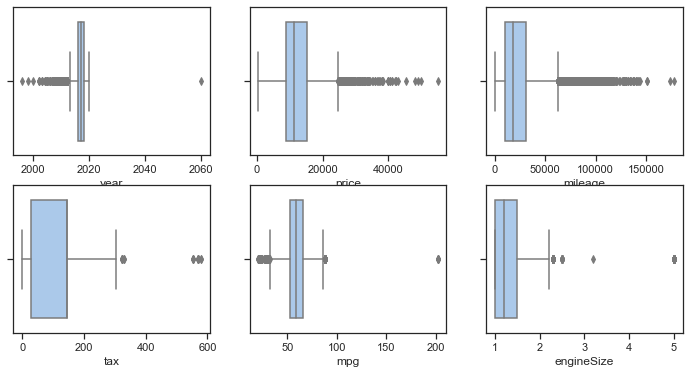

In [53]:
#conjunto de boxplots
fig = plt.figure(figsize=(12, 6))

for i in range(len(colunas_quantitativas)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.boxplot(ford[colunas_quantitativas[i]])

## Definindo funções para analisar detalhadamente cada coluna em busca de outliers e dados incongruentes

In [89]:
#Importa função display para mostrar tabelas no notebook
from IPython.display import display, HTML

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


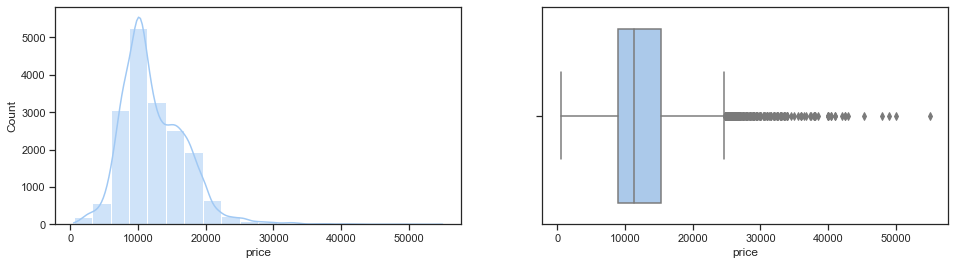

model  year  price transmission  mileage  \
Maiores Outliers 11912            Focus  2018  54995       Manual    11000   
                 11913          Mustang  2017  49999       Manual    21575   
                 11910          Mustang  2017  48999    Automatic     7546   
                 17866          Mustang  2020  48000       Manual       50   
                 12613          Mustang  2019  45250    Automatic     2500   
                 10901          Mustang  2020  42999       Manual       10   
                 12996          Mustang  2019  42500    Automatic      226   
                 302            Mustang  2020  42489    Automatic     3500   
                 13431          Mustang  2019  42000    Semi-Auto      756   
                 12600          Mustang  2020  41000       Manual      100   
Menores Outliers 2321             Focus  2019  26698       Manual     3498   
                 8292             Focus  2020  26723       Manual     2102   
                 11102            Focus  2019  26780       Manual     4763   
                 4901             Focus  2017  26900       Manual    14929   
                 8136             S-MAX  2018  26900    Automatic     9305   
                 9681    Tourneo Custom  2019  26922       Manual     1410   
                 12979           Galaxy  2019  26950       Manual     2815   
                 12696            Focus  2019  26950       Manual     7042   
                 9114              Edge  2018  26995    Automatic     8633   
                 13095            Focus  2019  26995       Manual     3500   

                       fuelType  tax   mpg  engineSize  
Maiores Outliers 11912   Petrol  145  36.7         2.3  
                 11913   Petrol  145  20.9         5.0  
                 11910   Petrol  145  23.5         5.0  
                 17866   Petrol  145  23.9         5.0  
                 12613   Petrol  145  22.1         5.0  
                 10901   Petrol  145  23.7         5.0  
                 12996   Petrol  145  22.1         5.0  
                 302     Petrol  145  22.1         5.0  
                 13431   Petrol  150  22.6         5.0  
                 12600   Petrol  145  22.8         5.0  
Menores Outliers 2321    Diesel  145  50.4         2.0  
                 8292    Petrol  145  34.5         2.3  
                 11102   Petrol  145  34.5         2.3  
                 4901    Petrol  150  36.7         2.3  
                 8136    Diesel  145  51.4         2.0  
                 9681    Diesel  145  30.1         2.0  
                 12979   Diesel  145  55.4         2.0  
                 12696   Diesel  145  50.4         2.0  
                 9114    Diesel  145  47.9         2.0  
                 13095   Diesel  145  50.4         2.0


    Coluna: price
    Número de entradas: 17914
    Número de outliers: 171
    Proporção de outliers: 0.009545606787987049
    


<Figure size 432x288 with 0 Axes>

In [95]:
def graficos_coluna(coluna, caixas='auto'):
    #Gera um histograma com linha e um boxplot com certo número de caixas ou automático.
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 2, 1)
    sns.histplot(coluna, kde=True, bins=caixas)
    ax = fig.add_subplot(1, 2, 2)
    sns.boxplot(coluna)
    plt.show()
    plt.clf()
    
def olhada_outliers(coluna):
    #Gera uma tabela contendo os 10 maiores e menores outliers e algumas informações sobre o número de outliers na coluna.
    array_zscore = np.abs(stats.zscore(coluna))
    boolarray_zscore = array_zscore.apply(lambda x: True if x >= 3 else False)
    lista_outliers = sorted(list(zip(list(array_zscore[boolarray_zscore]), list(coluna[boolarray_zscore]))),reverse=True)
    display(pd.concat([ford[boolarray_zscore].sort_values(by=coluna.name, ascending=False).head(10), ford[boolarray_zscore].sort_values(by=coluna.name, ascending=True).head(10)], keys=['Maiores Outliers', 'Menores Outliers']))
    print(f'''
    Coluna: {coluna.name}
    Número de entradas: {len(coluna)}
    Número de outliers: {boolarray_zscore.sum()}
    Proporção de outliers: {boolarray_zscore.sum()/len(coluna)}
    ''')
    
    
def analise_outliers(coluna, caixas='auto'):
    #Chama as duas funções para uma análise completa
    graficos_coluna(coluna, caixas=caixas)
    olhada_outliers(coluna)

# Análise de outliers por coluna

## year

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


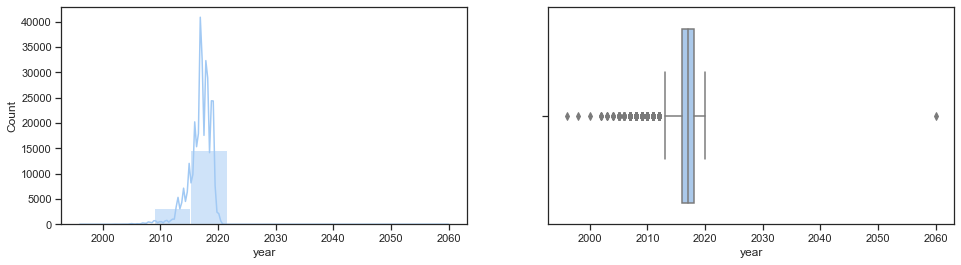

model  year  price transmission  mileage fuelType  \
Maiores Outliers 17726   Fiesta  2060   6495    Automatic    54807   Petrol   
                 17242   Fiesta  2010   4795       Manual    54869   Petrol   
                 14554   Mondeo  2010   3493       Manual   140000   Diesel   
                 16353    Focus  2010   2495       Manual    93900   Diesel   
                 17268    Focus  2010   3485       Manual    90000   Diesel   
                 14805    Focus  2010   3699       Manual    60466   Diesel   
                 16354   Mondeo  2010   2495       Manual    88642   Diesel   
                 14743     Kuga  2010  15999       Manual    25490   Petrol   
                 17270   Fiesta  2010   4985    Automatic    70000   Petrol   
                 14586       KA  2010   3995       Manual    33563   Petrol   
Menores Outliers 16878   Escort  1996   3000       Manual    50000   Petrol   
                 13544   Fiesta  1998   2699       Manual    37000   Petrol   
                 17282   Fiesta  2000   1995       Manual    43000   Petrol   
                 16899     Puma  2002   2195       Manual   108000   Petrol   
                 16900     Puma  2002   2695       Manual    69000   Petrol   
                 14367   Mondeo  2002    895       Manual   136784   Petrol   
                 16970    Focus  2003   1695       Manual    89630   Petrol   
                 17103    Focus  2003    495       Manual   177644   Petrol   
                 16819    Focus  2003   3999       Manual    56064   Petrol   
                 16907   Fiesta  2004    950       Manual    74000   Petrol   

                        tax   mpg  engineSize  
Maiores Outliers 17726  205  42.8         1.4  
                 17242  150  48.7         1.6  
                 14554  145  53.3         2.0  
                 16353   30  62.8         1.6  
                 17268   30  62.8         1.6  
                 14805  160  51.4         2.0  
                 16354  200  48.7         1.8  
                 14743  150  60.1         1.5  
                 17270  205  42.8         1.4  
                 14586   30  55.4         1.2  
Menores Outliers 16878  265  34.4         1.8  
                 13544  160  41.5         1.2  
                 17282  160  41.5         1.3  
                 16899  230  38.2         1.7  
                 16900  220  38.7         1.6  
                 14367  300  36.2         1.8  
                 16970  200  40.9         1.6  
                 17103  200  41.5         1.6  
                 16819  325  31.0         2.0  
                 16907  160  45.6         1.2


    Coluna: year
    Número de entradas: 17914
    Número de outliers: 290
    Proporção de outliers: 0.016188455956235345
    


<Figure size 432x288 with 0 Axes>

In [98]:
analise_outliers(ford['year'], caixas=10)

O único outlier que provavelmente significa um dado errado é o com o ano 2060. Vamos eliminá-lo.

In [99]:
ford = ford[ford['year']!=2060]

## price

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


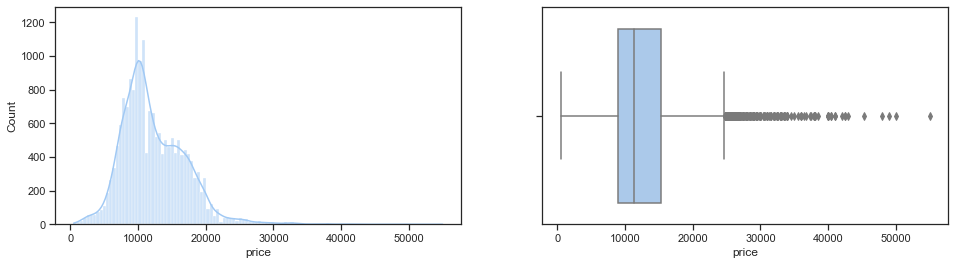

model  year  price transmission  mileage  \
Maiores Outliers 11912            Focus  2018  54995       Manual    11000   
                 11913          Mustang  2017  49999       Manual    21575   
                 11910          Mustang  2017  48999    Automatic     7546   
                 17866          Mustang  2020  48000       Manual       50   
                 12613          Mustang  2019  45250    Automatic     2500   
                 10901          Mustang  2020  42999       Manual       10   
                 12996          Mustang  2019  42500    Automatic      226   
                 302            Mustang  2020  42489    Automatic     3500   
                 13431          Mustang  2019  42000    Semi-Auto      756   
                 12600          Mustang  2020  41000       Manual      100   
Menores Outliers 2321             Focus  2019  26698       Manual     3498   
                 8292             Focus  2020  26723       Manual     2102   
                 11102            Focus  2019  26780       Manual     4763   
                 4901             Focus  2017  26900       Manual    14929   
                 8136             S-MAX  2018  26900    Automatic     9305   
                 9681    Tourneo Custom  2019  26922       Manual     1410   
                 12979           Galaxy  2019  26950       Manual     2815   
                 12696            Focus  2019  26950       Manual     7042   
                 9114              Edge  2018  26995    Automatic     8633   
                 13095            Focus  2019  26995       Manual     3500   

                       fuelType  tax   mpg  engineSize  
Maiores Outliers 11912   Petrol  145  36.7         2.3  
                 11913   Petrol  145  20.9         5.0  
                 11910   Petrol  145  23.5         5.0  
                 17866   Petrol  145  23.9         5.0  
                 12613   Petrol  145  22.1         5.0  
                 10901   Petrol  145  23.7         5.0  
                 12996   Petrol  145  22.1         5.0  
                 302     Petrol  145  22.1         5.0  
                 13431   Petrol  150  22.6         5.0  
                 12600   Petrol  145  22.8         5.0  
Menores Outliers 2321    Diesel  145  50.4         2.0  
                 8292    Petrol  145  34.5         2.3  
                 11102   Petrol  145  34.5         2.3  
                 4901    Petrol  150  36.7         2.3  
                 8136    Diesel  145  51.4         2.0  
                 9681    Diesel  145  30.1         2.0  
                 12979   Diesel  145  55.4         2.0  
                 12696   Diesel  145  50.4         2.0  
                 9114    Diesel  145  47.9         2.0  
                 13095   Diesel  145  50.4         2.0


    Coluna: price
    Número de entradas: 17913
    Número de outliers: 171
    Proporção de outliers: 0.009546139675096299
    


<Figure size 432x288 with 0 Axes>

In [100]:
analise_outliers(ford['price'])

O único que aparenta ser um dado errado é o Focus que custa 54995. É possível que se trate de um carro modificado de alguma maneira que seu valor aumentasse consideravelmente. De qualquer forma, não é útil para nossa análise. Eliminemo-lo.

In [101]:
ford = ford[(ford['price']!=54995)]

## mileage

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


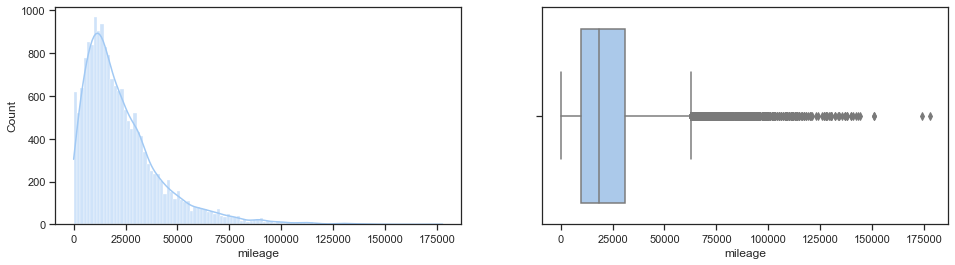

model  year  price transmission  mileage  \
Maiores Outliers 17103         Focus  2003    495       Manual   177644   
                 16946        Galaxy  2008   3995       Manual   174000   
                 16939        Mondeo  2012   3495       Manual   151000   
                 16250        Mondeo  2015   5795       Manual   150890   
                 17742         S-MAX  2007   2400       Manual   144000   
                 15709   Grand C-MAX  2011   3399       Manual   142963   
                 14508        Mondeo  2015   6391       Manual   142000   
                 16653         Focus  2008   1995       Manual   141000   
                 14554        Mondeo  2010   3493       Manual   140000   
                 16947         Focus  2009   1695       Manual   139600   
Menores Outliers 13587         C-MAX  2013   5495       Manual    81899   
                 11355           Ka+  2017   5750       Manual    81942   
                 16398        Mondeo  2014   7495       Manual    82000   
                 17760         C-MAX  2007   2695       Manual    82000   
                 17077        Mondeo  2015   8990    Automatic    82000   
                 17250         C-MAX  2008   2479       Manual    82000   
                 16704        Fiesta  2008    694       Manual    82020   
                 4326         Mondeo  2015   7999       Manual    82094   
                 17007          Kuga  2017  11500       Manual    82240   
                 16311         S-MAX  2015  11500       Manual    82370   

                       fuelType  tax   mpg  engineSize  
Maiores Outliers 17103   Petrol  200  41.5         1.6  
                 16946   Diesel  220  44.8         1.8  
                 16939   Diesel   30  65.7         1.6  
                 16250   Diesel   30  65.7         2.0  
                 17742   Diesel  240  44.1         2.0  
                 15709   Diesel  145  53.3         2.0  
                 14508   Diesel   20  68.9         2.0  
                 16653   Petrol  200  42.2         1.6  
                 14554   Diesel  145  53.3         2.0  
                 16947   Petrol  145  48.7         1.6  
Menores Outliers 13587   Petrol  160  42.8         1.6  
                 11355   Petrol  150  57.7         1.2  
                 16398   Diesel   30  62.8         2.0  
                 17760   Petrol  235  39.8         1.8  
                 17077   Diesel  125  58.9         2.0  
                 17250   Petrol  240  38.7         2.0  
                 16704   Petrol  145  47.1         1.2  
                 4326    Diesel   20  68.9         2.0  
                 17007   Diesel  145  54.3         2.0  
                 16311   Petrol  125  56.5         1.5


    Coluna: mileage
    Número de entradas: 17912
    Número de outliers: 327
    Proporção de outliers: 0.01825591782045556
    


<Figure size 432x288 with 0 Axes>

In [102]:
analise_outliers(ford['mileage'])

Todos os outliers parecem legítimos. Não há razão para eliminar nenhum nesse estágio.

## tax

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


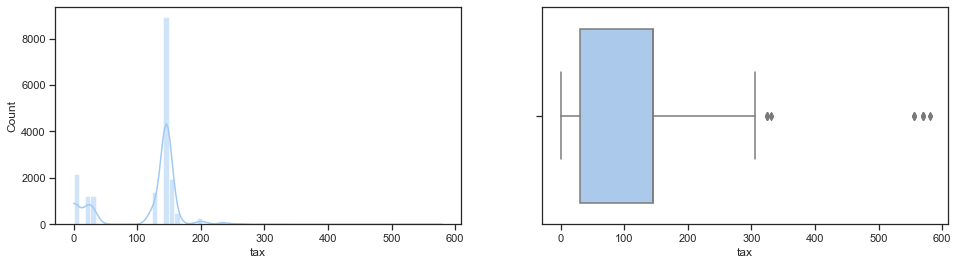

model  year  price transmission  mileage fuelType  \
Maiores Outliers 11097   Mustang  2016  27925       Manual    11600   Petrol   
                 3163    Mustang  2017  27890    Semi-Auto    26452   Petrol   
                 364     Mustang  2016  24999    Semi-Auto    42086   Petrol   
                 3395    Mustang  2017  28000    Semi-Auto    23179   Petrol   
                 3687    Mustang  2016  26475       Manual    12000   Petrol   
                 6136    Mustang  2016  27999    Semi-Auto    26104   Petrol   
                 9790    Mustang  2016  28490    Automatic    18500   Petrol   
                 12400   Mustang  2017  28000    Semi-Auto     8470   Petrol   
                 13741      Kuga  2012   9490    Automatic    56384   Petrol   
                 17430     S-MAX  2008   4890    Automatic   106000   Petrol   
Menores Outliers 17468    Mondeo  2009   2790       Manual   114000   Petrol   
                 16254     S-MAX  2013  11000    Automatic    71430   Diesel   
                 14367    Mondeo  2002    895       Manual   136784   Petrol   
                 13832     S-MAX  2014  10911    Automatic    40000   Diesel   
                 13631     Focus  2007   2895    Automatic    54000   Petrol   
                 13605     C-MAX  2009   3395    Automatic    88000   Petrol   
                 13485    Mondeo  2009   2750    Automatic   110000   Diesel   
                 16975    Mondeo  2008   3295       Manual    85500   Petrol   
                 17254     S-MAX  2014  11995    Automatic    25459   Diesel   
                 17447    Galaxy  2010   4490    Automatic   114000   Petrol   

                        tax   mpg  engineSize  
Maiores Outliers 11097  580  20.9         5.0  
                 3163   580  23.5         5.0  
                 364    570  23.5         5.0  
                 3395   570  23.5         5.0  
                 3687   570  20.9         5.0  
                 6136   570  20.8         5.0  
                 9790   570  23.5         5.0  
                 12400  570  23.5         5.0  
                 13741  555  27.4         2.5  
                 17430  555  29.1         2.3  
Menores Outliers 17468  300  35.8         2.0  
                 16254  300  39.8         2.2  
                 14367  300  36.2         1.8  
                 13832  300  39.8         2.2  
                 13631  300  34.9         2.0  
                 13605  300  34.9         2.0  
                 13485  300  39.8         2.0  
                 16975  300  35.8         2.0  
                 17254  300  39.8         2.2  
                 17447  300  34.9         2.0


    Coluna: tax
    Número de entradas: 17912
    Número de outliers: 33
    Proporção de outliers: 0.0018423403305046896
    


<Figure size 432x288 with 0 Axes>

In [103]:
analise_outliers(ford['tax'])

Alguns carros acarretaram em mais impostos, mas nenhum chega a ter um valor escandaloso. Para julgar essa questão com mais exatidão seria útil conhecimento em como funcionam os impostos em carros nos EUA.

## mpg

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


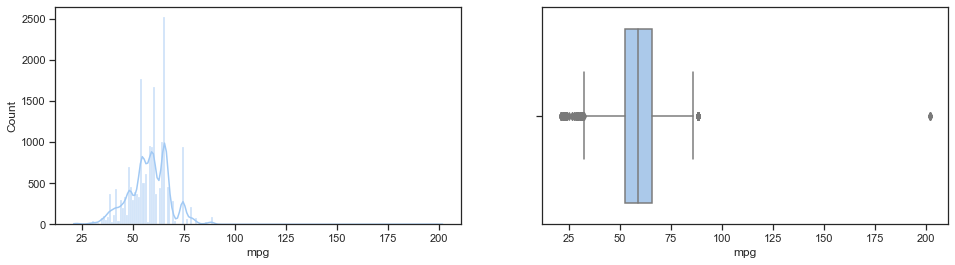

model  year  price transmission  mileage fuelType  \
Maiores Outliers 6536       Kuga  2020  31991    Semi-Auto     2357   Hybrid   
                 6153       Kuga  2020  31000    Semi-Auto       10   Hybrid   
                 13730      Kuga  2020  32995    Automatic       11   Hybrid   
                 9220       Kuga  2020  32000    Automatic       10   Hybrid   
                 12862      Kuga  2020  33500    Automatic     5534   Hybrid   
                 8168     Fiesta  2018   9270       Manual    58470   Diesel   
                 9551     Fiesta  2018  12000       Manual     9662   Diesel   
                 10378    Fiesta  2016   7691       Manual    49030   Diesel   
                 15821    Fiesta  2015   7299       Manual    42324   Diesel   
                 9999     Fiesta  2017   9495       Manual    33691   Diesel   
Menores Outliers 13356   Mustang  2018  37500       Manual     5572   Petrol   
                 6136    Mustang  2016  27999    Semi-Auto    26104   Petrol   
                 7182    Mustang  2017  32990    Automatic    12000   Petrol   
                 3687    Mustang  2016  26475       Manual    12000   Petrol   
                 17207   Mustang  2018  30500       Manual     5000   Petrol   
                 15729   Mustang  2018  28489       Manual    15744   Petrol   
                 741     Mustang  2018  29998       Manual    20847   Petrol   
                 13418   Mustang  2017  27500       Manual    20700   Petrol   
                 13041   Mustang  2017  27990       Manual    17030   Petrol   
                 11913   Mustang  2017  49999       Manual    21575   Petrol   

                        tax    mpg  engineSize  
Maiores Outliers 6536   135  201.8         2.5  
                 6153   135  201.8         2.5  
                 13730  135  201.8         2.5  
                 9220   140  201.8         2.5  
                 12862  140  201.8         2.5  
                 8168   145   88.3         1.5  
                 9551   145   88.3         1.5  
                 10378    0   88.3         1.5  
                 15821    0   88.3         1.5  
                 9999   145   88.3         1.5  
Menores Outliers 13356  145   20.8         5.0  
                 6136   570   20.8         5.0  
                 7182   145   20.8         5.0  
                 3687   570   20.9         5.0  
                 17207  145   20.9         5.0  
                 15729  150   20.9         5.0  
                 741    145   20.9         5.0  
                 13418  150   20.9         5.0  
                 13041  150   20.9         5.0  
                 11913  145   20.9         5.0


    Coluna: mpg
    Número de entradas: 17912
    Número de outliers: 137
    Proporção de outliers: 0.00764850379633765
    


<Figure size 432x288 with 0 Axes>

In [104]:
analise_outliers(ford['mpg'])

Os valores parecem corresponder à informação sobre eficiência do veículo fornecida pela fabricante. Uma tabela de valores deve confirmar isso.

In [116]:
ford['model+transmission'] = ford['model'] + ' ' + ford['fuelType']
ford.groupby('model+transmission')['mpg'].value_counts().head(30)

model+transmission  mpg 
 B-MAX Diesel       74.4     27
                    70.6     22
                    74.3     16
                    68.9     12
                    47.1      1
 B-MAX Petrol       44.1     91
                    55.4     79
                    57.7     56
                    47.1     41
                    56.5      9
                    80.7      1
 C-MAX Diesel       68.9    187
                    64.2     51
                    61.4     34
                    58.9     16
                    50.4      7
                    62.8      7
                    55.4      5
                    56.5      5
                    51.4      3
                    67.3      2
                    52.3      1
                    57.7      1
                    60.1      1
 C-MAX Petrol       55.4    131
                    44.1     29
                    42.8     16
                    48.7     16
                    39.8      9
                    49.6      8
Name: mpg, dtyp

Parece haver algum tipo de variação mesmo entre carros com o mesmo modelo e tipo de combustível. Talvez alguns carros exibam a eficiência como dita pela fabricante e outros tenham uma medida personalizada. É possível que isso afete a análise com essa variável de alguma forma.

## engineSize

C:\Users\pedro\anaconda3\envs\mep\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


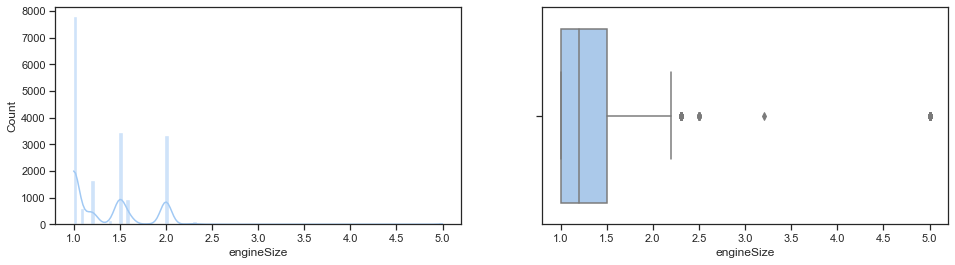

model  year  price transmission  mileage fuelType  \
Maiores Outliers 302     Mustang  2020  42489    Automatic     3500   Petrol   
                 354     Mustang  2018  31498    Automatic     6250   Petrol   
                 10901   Mustang  2020  42999       Manual       10   Petrol   
                 11097   Mustang  2016  27925       Manual    11600   Petrol   
                 11205   Mustang  2019  36799    Semi-Auto    10810   Petrol   
                 11910   Mustang  2017  48999    Automatic     7546   Petrol   
                 11913   Mustang  2017  49999       Manual    21575   Petrol   
                 12400   Mustang  2017  28000    Semi-Auto     8470   Petrol   
                 12600   Mustang  2020  41000       Manual      100   Petrol   
                 12613   Mustang  2019  45250    Automatic     2500   Petrol   
Menores Outliers 13607    Ranger  2013  14495       Manual    88000   Diesel   
                 302     Mustang  2020  42489    Automatic     3500   Petrol   
                 10901   Mustang  2020  42999       Manual       10   Petrol   
                 11097   Mustang  2016  27925       Manual    11600   Petrol   
                 11205   Mustang  2019  36799    Semi-Auto    10810   Petrol   
                 11910   Mustang  2017  48999    Automatic     7546   Petrol   
                 11913   Mustang  2017  49999       Manual    21575   Petrol   
                 12400   Mustang  2017  28000    Semi-Auto     8470   Petrol   
                 12600   Mustang  2020  41000       Manual      100   Petrol   
                 12613   Mustang  2019  45250    Automatic     2500   Petrol   

                        tax   mpg  engineSize model+transmission  
Maiores Outliers 302    145  22.1         5.0     Mustang Petrol  
                 354    145  23.5         5.0     Mustang Petrol  
                 10901  145  23.7         5.0     Mustang Petrol  
                 11097  580  20.9         5.0     Mustang Petrol  
                 11205  145  22.1         5.0     Mustang Petrol  
                 11910  145  23.5         5.0     Mustang Petrol  
                 11913  145  20.9         5.0     Mustang Petrol  
                 12400  570  23.5         5.0     Mustang Petrol  
                 12600  145  22.8         5.0     Mustang Petrol  
                 12613  145  22.1         5.0     Mustang Petrol  
Menores Outliers 13607  240  28.3         3.2      Ranger Diesel  
                 302    145  22.1         5.0     Mustang Petrol  
                 10901  145  23.7         5.0     Mustang Petrol  
                 11097  580  20.9         5.0     Mustang Petrol  
                 11205  145  22.1         5.0     Mustang Petrol  
                 11910  145  23.5         5.0     Mustang Petrol  
                 11913  145  20.9         5.0     Mustang Petrol  
                 12400  570  23.5         5.0     Mustang Petrol  
                 12600  145  22.8         5.0     Mustang Petrol  
                 12613  145  22.1         5.0     Mustang Petrol


    Coluna: engineSize
    Número de entradas: 17912
    Número de outliers: 46
    Proporção de outliers: 0.00256811076373381
    


<Figure size 432x288 with 0 Axes>

In [117]:
analise_outliers(ford['engineSize'])

O número de valores dessa variável é tão limitado que é melhor tratá-la como variável qualitativa do que quantitativa na maioria dos casos, apesar de representar um tamanho.